### Examples for tfdeepsurv

Data generated by simulator.

In [1]:
import os
import numpy as np
import tensorflow as tf

os.getcwd()

np.random.seed(10)

from tfdeepsurv.dsl import dsnn
from tfdeepsurv.utils import load_simulated_data

train_X, train_y = load_simulated_data(n=1000, m=5)

In [2]:
n_features = train_X.shape[1]
print("features: ", n_features)
model = dsnn(train_X, train_y,
            n_features, [10, 5], 1, 
            learning_rate=0.3,
            activation='relu', 
            L1_reg=0.0002, 
            L2_reg=0.0003,
            optimizer='adam')

model.get_ties()

features:  5


'noties'

-------------------------------------------------
training steps 1:
loss = 6.40413.

CI = 0.548629.

-------------------------------------------------
training steps 101:
loss = 6.40076.

CI = 0.649943.

-------------------------------------------------
training steps 201:
loss = 6.14951.

CI = 0.770346.

-------------------------------------------------
training steps 301:
loss = 5.63349.

CI = 0.820578.

-------------------------------------------------
training steps 401:
loss = 5.58093.

CI = 0.828824.

-------------------------------------------------
training steps 501:
loss = 5.57049.

CI = 0.830189.

-------------------------------------------------
training steps 601:
loss = 5.55593.

CI = 0.832978.

-------------------------------------------------
training steps 701:
loss = 5.54516.

CI = 0.834535.

-------------------------------------------------
training steps 801:
loss = 5.53698.

CI = 0.835852.

-------------------------------------------------
training steps 901:
loss 

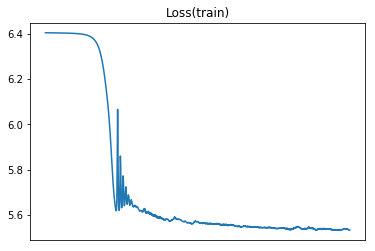

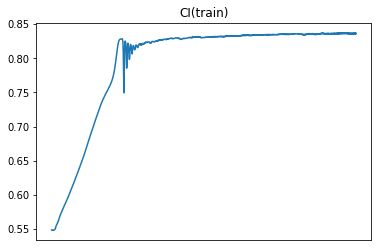

In [3]:
model.train(num_epoch=1000, iteration=100, plot_train_loss=True, plot_train_ci=True)

In [4]:
print("CI on train set: %g" % model.score(train_X, train_y))

test_X, test_y = load_simulated_data(n=1200, m=5, seed=42)
print("CI on train set: %g" % model.score(test_X, test_y))

CI on train set: 0.837224
CI on train set: 0.81514


In [5]:
model.get_vip_byweights()

0th feature score : 0.130655.
1th feature score : 1.
2th feature score : 0.134707.
3th feature score : 0.0107888.
4th feature score : 0.249246.


array([0.13065481, 1.        , 0.13470742, 0.01078877, 0.24924587],
      dtype=float32)

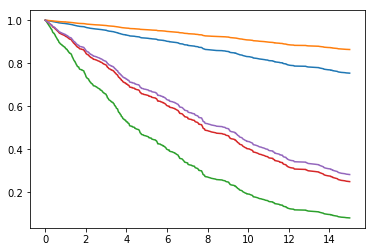

In [7]:
_ = model.survival_function(test_X[1:6], algo="wwe")

In [8]:
[model.sess.run(w) for w in model.nnweights]

[array([[-8.8054925e-01,  1.4477444e+00,  1.7860663e+00,  1.7530027e-01,
         -1.7133924e+00, -6.7039907e-01, -1.2832095e-01, -1.0324457e-01,
          1.2293365e-02,  6.8910193e-01],
        [ 1.5097264e+00, -1.8929844e-01, -1.6690251e-01, -2.0975018e-02,
         -1.7441689e+00,  7.4724311e-01,  2.4263105e-01,  2.1183417e+00,
         -6.9836423e-02, -1.0994024e+00],
        [ 3.3548698e-02, -2.3260972e-01, -3.3245690e-02, -4.2234451e-01,
         -8.9733049e-02, -4.3351638e-01,  2.8659356e-01,  3.2269955e-01,
         -3.1683201e-01,  2.2071932e-01],
        [-2.8408930e-01,  1.8982453e-03,  4.7897551e-02, -4.9280807e-01,
          1.7943627e-01, -1.7214523e-01,  1.1293941e-01,  2.0334804e-01,
          2.6617321e-01, -2.9226410e-01],
        [ 9.9918164e-02, -3.5946307e-01,  2.1213293e-01,  1.8321820e-01,
         -1.8181136e-01,  5.8247857e-03,  4.1593781e-01, -1.3519977e-01,
         -5.4160792e-01,  3.6299282e-01]], dtype=float32),
 array([[-6.3005143e-01,  5.2552336e-01,  2